In [1]:
# Set up IPython to show all outputs from a cell
import warnings
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

warnings.filterwarnings('ignore', category=RuntimeWarning)

RANDOM_STATE = 50
EPOCHS = 25
BATCH_SIZE = 2048
TRAINING_LENGTH = 25
TRAIN_FRACTION = 0.7
LSTM_CELLS = 64
VERBOSE = 0
SAVE_MODEL = True

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16814990661056227338
]


In [3]:
import pandas as pd
import numpy as np

# Read in data
data = pd.read_table('./qts_tab.txt', sep='\t', lineterminator='\n')

# Extract poems
original_poems = list(data['body'])
len(original_poems)

data.head()

42974

,volume,title,author,body
0,1_1,帝京篇十首,李世民,秦川雄帝宅，函谷壮皇居。绮殿千寻起，离宫百雉馀。连薨遥接汉，飞观迥凌虚。云日隐层阙，风烟出绮...
1,1_2,饮马长城窟行,李世民,塞外悲风切，交河冰已结。瀚海百重波，阴山千里雪。迥戍危烽火，层峦引高节。悠悠卷旆旌，饮马出长...
2,1_3,执契静三边,李世民,执契静三边，持衡临万姓。玉彩辉关烛，金华流日镜。无为宇宙清，有美璇玑正。皎佩星连景，飘衣云结...
3,1_4,正日临朝,李世民,条风开献节，灰律动初阳。百蛮奉遐赆，万国朝未央。虽无舜禹迹，幸欣天地康。车轨同八表，书文混四...
4,1_5,幸武功庆善宫,李世民,寿丘惟旧迹，酆邑乃前基。粤予承累圣，悬弧亦在兹。弱龄逢运改，提剑郁匡时。指麾八荒定，怀柔万国...


In [4]:
data['body'][100]

'润色鸿业寄贤才，叨居右弼愧盐梅。运筹帷幄荷时来，职掌图籍滥蓬莱。两司谬忝谢钟裴，礼乐铨管效涓埃。陈师振旅清九垓，欣承顾问侍天杯。衔恩献寿柏梁台，黄缣青简奉康哉。鲰生侍从忝王枚，右掖司言实不才。宗伯秩礼天地开，帝歌难续仰昭回。微臣捧日变寒灰，远惭班左愧游陪。'

In [5]:
import jieba
jieba.lcut(data['body'][100])
#mod_poems = [" ".join(jieba.lcut(data['body'][i])) for i in range(len(data))]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/m6/d8g6tpv97wq9ls9jbhwc3n3w0000gn/T/jieba.cache
Loading model cost 0.675 seconds.
Prefix dict has been built successfully.


['润色',
 '鸿业',
 '寄',
 '贤才',
 '，',
 '叨居',
 '右弼愧',
 '盐梅',
 '。',
 '运筹帷幄',
 '荷时',
 '来',
 '，',
 '职掌',
 '图籍',
 '滥',
 '蓬莱',
 '。',
 '两司',
 '谬',
 '忝',
 '谢钟',
 '裴',
 '，',
 '礼乐',
 '铨',
 '管效',
 '涓埃',
 '。',
 '陈师振',
 '旅清',
 '九',
 '垓',
 '，',
 '欣承',
 '顾问',
 '侍天杯',
 '。',
 '衔恩献寿',
 '柏梁台',
 '，',
 '黄',
 '缣',
 '青',
 '简奉康',
 '哉',
 '。',
 '鲰',
 '生',
 '侍从',
 '忝',
 '王枚',
 '，',
 '右掖司',
 '言实',
 '不才',
 '。',
 '宗伯',
 '秩礼',
 '天地',
 '开',
 '，',
 '帝歌',
 '难续',
 '仰昭回',
 '。',
 '微臣',
 '捧',
 '日',
 '变寒',
 '灰',
 '，',
 '远惭班',
 '左愧游',
 '陪',
 '。']

In [6]:
original_poems[100]

'润色鸿业寄贤才，叨居右弼愧盐梅。运筹帷幄荷时来，职掌图籍滥蓬莱。两司谬忝谢钟裴，礼乐铨管效涓埃。陈师振旅清九垓，欣承顾问侍天杯。衔恩献寿柏梁台，黄缣青简奉康哉。鲰生侍从忝王枚，右掖司言实不才。宗伯秩礼天地开，帝歌难续仰昭回。微臣捧日变寒灰，远惭班左愧游陪。'

In [7]:
#import jieba
#sentence = u'即使在最黑暗的日子，幸福也是有迹可循的，只要你记得为自己点亮一盏灯。'
#words = jieba.lcut(sentence)

## Build the vocabulary with word embeddings
#url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.zh_classical.vec'
#TEXT.vocab.load_vectors(vectors=Vectors('wiki.zh_classical.vec', url=url))

#print("Word embeddings size ", TEXT.vocab.vectors.size())
##print("Word embedding of 'follows', first 10 dim ", TEXT.vocab.vectors[TEXT.vocab.stoi['follows']][:10])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
" ".join(jieba.lcut(example0, cut_all=False))
#len(jieba.lcut(example0, cut_all=False))
#len(jieba.lcut(example0, cut_all=True))

NameError: name 'example0' is not defined

In [9]:
from keras.preprocessing.text import Tokenizer

#example = 'This is a short sentence (1) with one reference to an image. This next sentence, while non-sensical, does not have an image and has two commas.'
example0 = '润色鸿业寄贤才，叨居右弼愧盐梅。运筹帷幄荷时来，职掌图籍滥蓬莱。两司谬忝谢钟裴，礼乐铨管效涓埃。陈师振旅清九垓，欣承顾问侍天杯。衔恩献寿柏梁台，黄缣青简奉康哉。鲰生侍从忝王枚，右掖司言实不才。宗伯秩礼天地开，帝歌难续仰昭回。微臣捧日变寒灰，远惭班左愧游陪。'
example = ' '.join(jieba.lcut(example0, cut_all=True))
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n。，')
tokenizer.fit_on_texts([example])
s = tokenizer.texts_to_sequences([example])[0]
' '.join(tokenizer.index_word[i] for i in s)

Using TensorFlow backend.


'润色 鸿业 寄 贤才 叨 居 右 弼 愧 盐 梅 运筹 运筹帷幄 帷幄 荷 时 来 职掌 图籍 滥 蓬莱 两 司 谬 忝 谢 钟 裴 礼乐 铨 管 效 涓埃 陈 师 振 旅 清 九 垓 欣 承 顾问 侍 天 杯 衔 恩 献 寿 柏梁台 黄 缣 青 简 奉 康 哉 鲰 生 侍从 忝 王 枚 右 掖 司 言实 不 才 宗 伯 秩 礼 天地 开 帝 歌 难 续 仰 昭 回 微臣 捧 日 变 寒 灰 远 惭 班 左 愧 游 陪'

In [10]:
tokenizer = Tokenizer(filters='"#$%&*+/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts([example])
s = tokenizer.texts_to_sequences([example])[0]
' '.join(tokenizer.index_word[i] for i in s)
tokenizer.word_index.keys()

'润色 鸿业 寄 贤才 ， 叨 居 右 弼 愧 盐 梅 。 运筹 运筹帷幄 帷幄 荷 时 来 ， 职掌 图籍 滥 蓬莱 。 两 司 谬 忝 谢 钟 裴 ， 礼乐 铨 管 效 涓埃 。 陈 师 振 旅 清 九 垓 ， 欣 承 顾问 侍 天 杯 。 衔 恩 献 寿 柏梁台 ， 黄 缣 青 简 奉 康 哉 。 鲰 生 侍从 忝 王 枚 ， 右 掖 司 言实 不 才 。 宗 伯 秩 礼 天地 开 ， 帝 歌 难 续 仰 昭 回 。 微臣 捧 日 变 寒 灰 ， 远 惭 班 左 愧 游 陪 。'

dict_keys(['，', '。', '右', '愧', '司', '忝', '润色', '鸿业', '寄', '贤才', '叨', '居', '弼', '盐', '梅', '运筹', '运筹帷幄', '帷幄', '荷', '时', '来', '职掌', '图籍', '滥', '蓬莱', '两', '谬', '谢', '钟', '裴', '礼乐', '铨', '管', '效', '涓埃', '陈', '师', '振', '旅', '清', '九', '垓', '欣', '承', '顾问', '侍', '天', '杯', '衔', '恩', '献', '寿', '柏梁台', '黄', '缣', '青', '简', '奉', '康', '哉', '鲰', '生', '侍从', '王', '枚', '掖', '言实', '不', '才', '宗', '伯', '秩', '礼', '天地', '开', '帝', '歌', '难', '续', '仰', '昭', '回', '微臣', '捧', '日', '变', '寒', '灰', '远', '惭', '班', '左', '游', '陪'])

In [11]:
import re


def format_poem(poem):
    """Add spaces around punctuation and remove references to images/citations."""
    
    # Pre-process using jieba
    poem = ' '.join(jieba.lcut(poem, cut_all=True))
    
    # Add spaces around punctuation
    poem = re.sub(r'(?<=[^\s0-9])(?=[.,。，;?])', r' ', poem)

    # Remove references to figures
    poem = re.sub(r'\((\d+)\)', r'', poem)

    # Remove double spaces
    poem = re.sub(r'\s\s', ' ', poem)
    return poem


f = format_poem(example0)
f

'润色 鸿业 寄 贤才 ， 叨 居 右 弼 愧 盐 梅 。 运筹 运筹帷幄 帷幄 荷 时 来 ， 职掌 图籍 滥 蓬莱 。 两 司 谬 忝 谢 钟 裴 ， 礼乐 铨 管 效 涓埃 。 陈 师 振 旅 清 九 垓 ， 欣 承 顾问 侍 天 杯 。 衔 恩 献 寿 柏梁台 ， 黄 缣 青 简 奉 康 哉 。 鲰 生 侍从 忝 王 枚 ， 右 掖 司 言实 不 才 。 宗 伯 秩 礼 天地 开 ， 帝 歌 难 续 仰 昭 回 。 微臣 捧 日 变 寒 灰 ， 远 惭 班 左 愧 游 陪 。'

In [12]:
tokenizer = Tokenizer(filters='"#$%&*+/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts([f])
s = tokenizer.texts_to_sequences([f])[0]
' '.join(tokenizer.index_word[i] for i in s)
tokenizer.word_index.keys()

'润色 鸿业 寄 贤才 ， 叨 居 右 弼 愧 盐 梅 。 运筹 运筹帷幄 帷幄 荷 时 来 ， 职掌 图籍 滥 蓬莱 。 两 司 谬 忝 谢 钟 裴 ， 礼乐 铨 管 效 涓埃 。 陈 师 振 旅 清 九 垓 ， 欣 承 顾问 侍 天 杯 。 衔 恩 献 寿 柏梁台 ， 黄 缣 青 简 奉 康 哉 。 鲰 生 侍从 忝 王 枚 ， 右 掖 司 言实 不 才 。 宗 伯 秩 礼 天地 开 ， 帝 歌 难 续 仰 昭 回 。 微臣 捧 日 变 寒 灰 ， 远 惭 班 左 愧 游 陪 。'

dict_keys(['，', '。', '右', '愧', '司', '忝', '润色', '鸿业', '寄', '贤才', '叨', '居', '弼', '盐', '梅', '运筹', '运筹帷幄', '帷幄', '荷', '时', '来', '职掌', '图籍', '滥', '蓬莱', '两', '谬', '谢', '钟', '裴', '礼乐', '铨', '管', '效', '涓埃', '陈', '师', '振', '旅', '清', '九', '垓', '欣', '承', '顾问', '侍', '天', '杯', '衔', '恩', '献', '寿', '柏梁台', '黄', '缣', '青', '简', '奉', '康', '哉', '鲰', '生', '侍从', '王', '枚', '掖', '言实', '不', '才', '宗', '伯', '秩', '礼', '天地', '开', '帝', '歌', '难', '续', '仰', '昭', '回', '微臣', '捧', '日', '变', '寒', '灰', '远', '惭', '班', '左', '游', '陪'])

In [13]:
def remove_spaces(poem):
    """Remove spaces around punctuation"""
    poem = re.sub(r'\s+([.,。，;?])', r'\1', poem)

    return poem


remove_spaces(' '.join(tokenizer.index_word[i] for i in s))

'润色 鸿业 寄 贤才， 叨 居 右 弼 愧 盐 梅。 运筹 运筹帷幄 帷幄 荷 时 来， 职掌 图籍 滥 蓬莱。 两 司 谬 忝 谢 钟 裴， 礼乐 铨 管 效 涓埃。 陈 师 振 旅 清 九 垓， 欣 承 顾问 侍 天 杯。 衔 恩 献 寿 柏梁台， 黄 缣 青 简 奉 康 哉。 鲰 生 侍从 忝 王 枚， 右 掖 司 言实 不 才。 宗 伯 秩 礼 天地 开， 帝 歌 难 续 仰 昭 回。 微臣 捧 日 变 寒 灰， 远 惭 班 左 愧 游 陪。'

In [14]:
formatted = []

# Iterate through all the original poems
for a in original_poems:
    formatted.append(format_poem(a))

len(formatted)

42974

In [15]:
def make_sequences(texts,
                   training_length=25,
                   lower=True,
                   filters='!"#$%&()*+,-.，。/:;<=>?@[\\]^_`{|}~\t\n'):
    """Turn a set of texts into sequences of integers"""

    # Create the tokenizer object and train on texts
    tokenizer = Tokenizer(lower=lower, filters=filters)
    tokenizer.fit_on_texts(texts)

    # Create look-up dictionaries and reverse look-ups
    word_idx = tokenizer.word_index
    idx_word = tokenizer.index_word
    num_words = len(word_idx) + 1
    word_counts = tokenizer.word_counts

    print(f'There are {num_words} unique words.')

    # Convert text to sequences of integers
    sequences = tokenizer.texts_to_sequences(texts)

    # Limit to sequences with more than training length tokens
    seq_lengths = [len(x) for x in sequences]
    over_idx = [
        i for i, l in enumerate(seq_lengths) if l > (training_length + 20)
    ]

    new_texts = []
    new_sequences = []

    # Only keep sequences with more than training length tokens
    for i in over_idx:
        new_texts.append(texts[i])
        new_sequences.append(sequences[i])

    training_seq = []
    labels = []

    # Iterate through the sequences of tokens
    for seq in new_sequences:

        # Create multiple training examples from each sequence
        for i in range(training_length, len(seq)):
            # Extract the features and label
            extract = seq[i - training_length:i + 1]

            # Set the features and label
            training_seq.append(extract[:-1])
            labels.append(extract[-1])

    print(f'There are {len(training_seq)} training sequences.')

    # Return everything needed for setting up the model
    return word_idx, idx_word, num_words, word_counts, new_texts, new_sequences, training_seq, labels

In [16]:
TRAINING_LENGTH = 25
filters = '!"#$%&()*+/:<=>@[\\]^_`{|}~\t\n'
word_idx, idx_word, num_words, word_counts, abstracts, sequences, features, labels = make_sequences(
    formatted, TRAINING_LENGTH, lower=True, filters=filters)

There are 50142 unique words.
There are 1301887 training sequences.


In [17]:
n = 3
features[n][:10]

[798, 1, 1827, 545, 1231, 478, 324, 2, 803, 392]

In [18]:
def find_answer(index):
    """Find label corresponding to features for index in training data"""

    # Find features and label
    feats = ' '.join(idx_word[i] for i in features[index])
    answer = idx_word[labels[index]]

    print('Features:', feats)
    print('\nLabel: ', answer)

In [19]:
find_answer(n)

Features: 宅 ， 函 谷 壮 皇 居 。 绮 殿 千 寻 起 ， 离宫 百 雉 馀 。 连 薨 遥 接 汉 ，

Label:  飞


In [20]:
original_poems[0]

'秦川雄帝宅，函谷壮皇居。绮殿千寻起，离宫百雉馀。连薨遥接汉，飞观迥凌虚。云日隐层阙，风烟出绮疏。岩廊罢机务，崇文聊驻辇。玉匣启龙图，金绳披凤篆。韦编断仍续，缥帙舒还卷。对此乃淹留，欹案观坟典。移步出词林，停舆欣武宴。雕弓写明月，骏马疑流电。惊雁落虚弦，啼猿悲急箭。阅赏诚多美，于兹乃忘倦。鸣笳临乐馆，眺听欢芳节。急管韵朱弦，清歌凝白雪。彩凤肃来仪，玄鹤纷成列。去兹郑卫声，雅音方可悦。芳辰追逸趣，禁苑信多奇。桥形通汉上，峰势接云危。烟霞交隐映，花鸟自参差。何如肆辙迹，万里赏瑶池。飞盖去芳园，兰桡游翠渚。萍间日彩乱，荷处香风举。桂楫满中川，弦歌振长屿。岂必汾河曲，方为欢宴所。落日双阙昏，回舆九重暮。长烟散初碧，皎月澄轻素。搴幌玩琴书，开轩引云雾。斜汉耿层阁，清风摇玉树。欢乐难再逢，芳辰良可惜。玉酒泛云罍，兰殽陈绮席。千钟合尧禹，百兽谐金石。得志重寸阴，忘怀轻尺璧。建章欢赏夕，二八尽妖妍。罗绮昭阳殿，芬芳玳瑁筵。佩移星正动，扇掩月初圆。无劳上悬圃，即此对神仙。以兹游观极，悠然独长想。披卷览前踪，抚躬寻既往。望古茅茨约，瞻今兰殿广。人道恶高危，虚心戒盈荡。奉天竭诚敬，临民思惠养。纳善察忠谏，明科慎刑赏。六五诚难继，四三非易仰。广待淳化敷，方嗣云亭响。'

In [21]:
find_answer(100)

Features: 写明 明月 ， 骏马 疑 流电 。 惊 雁 落 虚 弦 ， 啼猿 悲 急 箭 。 阅 赏 诚 多美 ， 于 兹

Label:  乃


In [22]:
sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:15]

[('，', 233068),
 ('。', 230596),
 ('不', 8004),
 ('有', 7779),
 ('无', 7655),
 ('人', 7435),
 ('云', 7258),
 ('君', 7102),
 ('来', 6976),
 ('为', 6797),
 ('在', 6467),
 ('一', 6233),
 ('春', 6080),
 ('中', 6013),
 ('时', 5996)]

In [23]:
from sklearn.utils import shuffle


def create_train_valid(features,
                       labels,
                       num_words,
                       train_fraction=TRAIN_FRACTION):
    """Create training and validation features and labels."""

    # Randomly shuffle features and labels
    features, labels = shuffle(features, labels, random_state=RANDOM_STATE)

    # Decide on number of samples for training
    train_end = int(train_fraction * len(labels))

    train_features = np.array(features[:train_end])
    valid_features = np.array(features[train_end:])

    train_labels = labels[:train_end]
    valid_labels = labels[train_end:]

    # Convert to arrays
    X_train, X_valid = np.array(train_features), np.array(valid_features)

    # Using int8 for memory savings
    y_train = np.zeros((len(train_labels), num_words), dtype=np.int8)
    y_valid = np.zeros((len(valid_labels), num_words), dtype=np.int8)

    # One hot encoding of labels
    for example_index, word_index in enumerate(train_labels):
        y_train[example_index, word_index] = 1

    for example_index, word_index in enumerate(valid_labels):
        y_valid[example_index, word_index] = 1

    # Memory management
    import gc
    gc.enable()
    del features, labels, train_features, valid_features, train_labels, valid_labels
    gc.collect()

    return X_train, X_valid, y_train, y_valid

In [24]:
X_train, X_valid, y_train, y_valid = create_train_valid(
    features, labels, num_words)
X_train.shape
y_train.shape

(911320, 25)

(911320, 50142)

In [25]:
import sys
sys.getsizeof(y_train) / 1e9

45.695407552

In [26]:
def check_sizes(gb_min=1):
    for x in globals():
        size = sys.getsizeof(eval(x)) / 1e9
        if size > gb_min:
            print(f'Object: {x:10}\tSize: {size} GB.')


check_sizes(gb_min=1)

Object: y_train   	Size: 45.695407552 GB.
Object: y_valid   	Size: 19.583810626 GB.


In [473]:
import os
from keras.utils import get_file

# Vectors to use
glove_vectors = '~/.keras/datasets/wiki.zh_classical.zip'

# Download word embeddings [if they are not present]
if not os.path.exists(glove_vectors):
    glove_vectors = get_file('wiki.zh_classical.zip',
                             'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.zh_classical.zip')
    !unzip -f '/Users/samuelmoy/.keras/datasets/wiki.zh_classical.zip'

# Load in unzipped file
glove_vectors = './wiki.zh_classical/wiki.zh_classical.vec'
glove = np.loadtxt(glove_vectors, dtype='str', comments=None)
glove.shape

Archive:  /Users/samuelmoy/.keras/datasets/wiki.zh_classical.zip


ValueError: Wrong number of columns at line 2

In [27]:
#import torch
## Text text processing library and methods for pretrained word embeddings
#import torchtext
#from torchtext.vocab import Vectors, GloVe

## Named Tensor wrappers
#from namedtensor import ntorch, NamedTensor
#from namedtensor.text import NamedField

import torchtext.vocab as vocab
custom_embeddings = vocab.Vectors(name = './wiki.zh_classical/wiki.zh_classical.vec')

In [28]:
print(custom_embeddings.vectors.size())
custom_embeddings.stoi

torch.Size([10696, 300])


{'}': 0,
 ')': 1,
 '(': 2,
 '，': 3,
 'and': 4,
 '。': 5,
 "'": 6,
 '</s>': 7,
 '-': 8,
 '之': 9,
 '、': 10,
 '也': 11,
 '>': 12,
 ',': 13,
 '.': 14,
 '）': 15,
 '（': 16,
 '者': 17,
 '為': 18,
 '以': 19,
 '其': 20,
 '曰': 21,
 '年': 22,
 '：': 23,
 '於': 24,
 '人': 25,
 '二': 26,
 '」': 27,
 '「': 28,
 '一': 29,
 '有': 30,
 '/': 31,
 '而': 32,
 '#': 33,
 '王': 34,
 '《': 35,
 '》': 36,
 '時': 37,
 '子': 38,
 '乃': 39,
 '與': 40,
 '日': 41,
 '\\': 42,
 '中': 43,
 '〇': 44,
 '"': 45,
 '至': 46,
 '名': 47,
 'the': 48,
 '所': 49,
 '大': 50,
 '四': 51,
 'utc': 52,
 '三': 53,
 '氏': 54,
 '字': 55,
 '%': 56,
 '文': 57,
 '今': 58,
 '漢': 59,
 '後': 60,
 '亦': 61,
 '國': 62,
 '或': 63,
 '不': 64,
 '；': 65,
 'a': 66,
 '是': 67,
 '帝': 68,
 '多': 69,
 '無': 70,
 '書': 71,
 '謂': 72,
 '元': 73,
 '世': 74,
 '？': 75,
 '稱': 76,
 '此': 77,
 '·': 78,
 '又': 79,
 '故': 80,
 '在': 81,
 '一九': 82,
 '\u3000': 83,
 '及': 84,
 'to': 85,
 '遂': 86,
 '皆': 87,
 '自': 88,
 '上': 89,
 '爲': 90,
 '則': 91,
 '生': 92,
 '諸': 93,
 '州': 94,
 '號': 95,
 '立': 96,
 '六': 97,
 '五': 98,
 '斯

In [29]:
vectors = custom_embeddings.vectors[:, 1:].numpy().astype('float')
words = list(custom_embeddings.stoi.keys())

del custom_embeddings

vectors[100], words[100]

(array([ 0.14944001, -0.010984  ,  0.050955  ,  0.017788  ,  0.084571  ,
        -0.066394  ,  0.17843001, -0.097123  ,  0.064354  ,  0.065977  ,
         0.043409  ,  0.27083001, -0.25452   ,  0.19599999,  0.098299  ,
        -0.33114001, -0.0545    , -0.18364   ,  0.007522  ,  0.039397  ,
        -0.099641  ,  0.043768  ,  0.48302001, -0.16561   , -0.15504999,
         0.036061  ,  0.23657   , -0.19905999,  0.18274   ,  0.23434   ,
         0.18697   , -0.09882   , -0.064952  ,  0.057829  , -0.11223   ,
        -0.10266   ,  0.11299   , -0.0067019 ,  0.02745   , -0.18362001,
        -0.0042932 ,  0.083086  ,  0.2       ,  0.15103   , -0.047175  ,
         0.016927  , -0.080804  , -0.14789   , -0.021097  , -0.11833   ,
         0.075209  ,  0.29705   , -0.029922  ,  0.042516  ,  0.05295   ,
         0.21228001, -0.060093  , -0.16531999,  0.021959  ,  0.10729   ,
         0.10614   ,  0.16182999,  0.16108   ,  0.28654999,  0.24206001,
         0.37278   ,  0.10959   , -0.039547  , -0.1

In [30]:
vectors.shape

(10696, 299)

In [31]:
word_lookup = {word: vector for word, vector in zip(words, vectors)}

embedding_matrix = np.zeros((num_words, vectors.shape[1]))

not_found = 0

for i, word in enumerate(word_idx.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector
    else:
        not_found += 1

print(f'There were {not_found} words without pre-trained embeddings.')

There were 46310 words without pre-trained embeddings.


In [32]:
import gc
gc.enable()
del vectors
gc.collect()

0

In [33]:
# Normalize and convert nan to 0
embedding_matrix = embedding_matrix / \
    np.linalg.norm(embedding_matrix, axis=1).reshape((-1, 1))
embedding_matrix = np.nan_to_num(embedding_matrix)

In [34]:
def find_closest(query, embedding_matrix, word_idx, idx_word, n=10):
    """Find closest words to a query word in embeddings"""

    idx = word_idx.get(query, None)
    # Handle case where query is not in vocab
    if idx is None:
        print(f'{query} not found in vocab.')
        return
    else:
        vec = embedding_matrix[idx]
        # Handle case where word doesn't have an embedding
        if np.all(vec == 0):
            print(f'{query} has no pre-trained embedding.')
            return
        else:
            # Calculate distance between vector and all others
            dists = np.dot(embedding_matrix, vec)

            # Sort indexes in reverse order
            idxs = np.argsort(dists)[::-1][:n]
            sorted_dists = dists[idxs]
            closest = [idx_word[i] for i in idxs]

    print(f'Query: {query}\n')
    max_len = max([len(i) for i in closest])
    # Print out the word and cosine distances
    for word, dist in zip(closest, sorted_dists):
        print(f'Word: {word:15} Cosine Similarity: {round(dist, 4)}')

In [35]:
find_closest('春', embedding_matrix, word_idx, idx_word)

Query: 春

Word: 春               Cosine Similarity: 1.0
Word: 富               Cosine Similarity: 0.7567
Word: 秋               Cosine Similarity: 0.6831
Word: 韶               Cosine Similarity: 0.6456
Word: 大帝              Cosine Similarity: 0.632
Word: 槎               Cosine Similarity: 0.6267
Word: 皎               Cosine Similarity: 0.6253
Word: 夫人              Cosine Similarity: 0.617
Word: 稽               Cosine Similarity: 0.6146
Word: 步               Cosine Similarity: 0.6103


In [36]:
find_closest('故事', embedding_matrix, word_idx, idx_word, 10)

Query: 故事

Word: 故事              Cosine Similarity: 1.0
Word: 天命              Cosine Similarity: 0.9089
Word: 金陵              Cosine Similarity: 0.9027
Word: 清人              Cosine Similarity: 0.901
Word: 宗旨              Cosine Similarity: 0.8963
Word: 擅               Cosine Similarity: 0.895
Word: 弓               Cosine Similarity: 0.8938
Word: 重臣              Cosine Similarity: 0.8916
Word: 兼通              Cosine Similarity: 0.8901
Word: 新政              Cosine Similarity: 0.8895


In [37]:
find_closest('。', embedding_matrix, word_idx, idx_word, 10)

Query: 。

Word: 。               Cosine Similarity: 1.0
Word: 券               Cosine Similarity: 0.6846
Word: 十番              Cosine Similarity: 0.6711
Word: 载               Cosine Similarity: 0.6682
Word: 千金              Cosine Similarity: 0.6647
Word: 五位              Cosine Similarity: 0.6625
Word: 踵               Cosine Similarity: 0.6609
Word: 百家              Cosine Similarity: 0.6571
Word: 租               Cosine Similarity: 0.6565
Word: 石碑              Cosine Similarity: 0.6544


In [38]:
find_closest('電腦', embedding_matrix, word_idx, idx_word)

電腦 not found in vocab.


In [39]:
find_closest('运筹', embedding_matrix, word_idx, idx_word)

运筹 has no pre-trained embedding.


In [40]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Bidirectional
from keras.optimizers import Adam

from keras.utils import plot_model

In [47]:
def make_word_level_model(num_words,
                          embedding_matrix,
                          lstm_cells=64,
                          trainable=False,
                          lstm_layers=1,
                          bi_direc=False):
    """Make a word level recurrent neural network with option for pretrained embeddings
       and varying numbers of LSTM cell layers."""

    model = Sequential()

    # Map words to an embedding
    if not trainable:
        model.add(
            Embedding(
                input_dim=num_words,
                output_dim=embedding_matrix.shape[1],
                weights=[embedding_matrix],
                trainable=False,
                mask_zero=True))
        model.add(Masking())
    else:
        model.add(
            Embedding(
                input_dim=num_words,
                output_dim=embedding_matrix.shape[1],
                weights=[embedding_matrix],
                trainable=True))

    # If want to add multiple LSTM layers
    if lstm_layers > 1:
        for i in range(lstm_layers - 1):
            model.add(
                LSTM(
                    lstm_cells,
                    return_sequences=True,
                    dropout=0.1,
                    recurrent_dropout=0.1))

    # Add final LSTM cell layer
    if bi_direc:
        model.add(
            Bidirectional(
                LSTM(
                    lstm_cells,
                    return_sequences=False,
                    dropout=0.1,
                    recurrent_dropout=0.1)))
    else:
        model.add(
            LSTM(
                lstm_cells,
                return_sequences=False,
                dropout=0.1,
                recurrent_dropout=0.1))
    model.add(Dense(128, activation='relu'))
    # Dropout for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_words, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model


model = make_word_level_model(
    num_words,
    embedding_matrix=embedding_matrix,
    lstm_cells=LSTM_CELLS,
    trainable=False,
    lstm_layers=1)
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 299)         15017873  
_________________________________________________________________
masking_1 (Masking)          (None, None, 299)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93184     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50227)             6479283   
Total params: 21,598,660
T

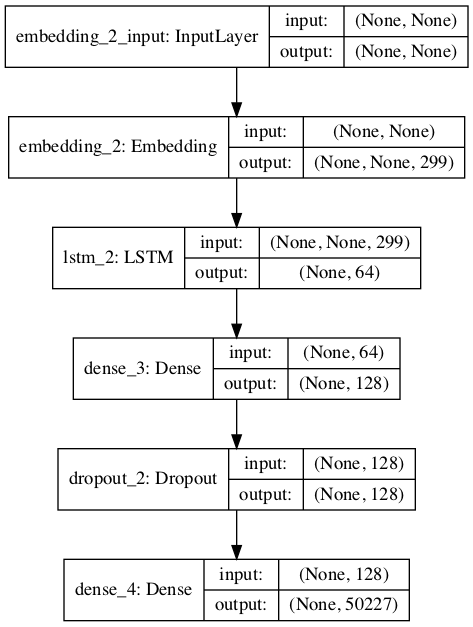

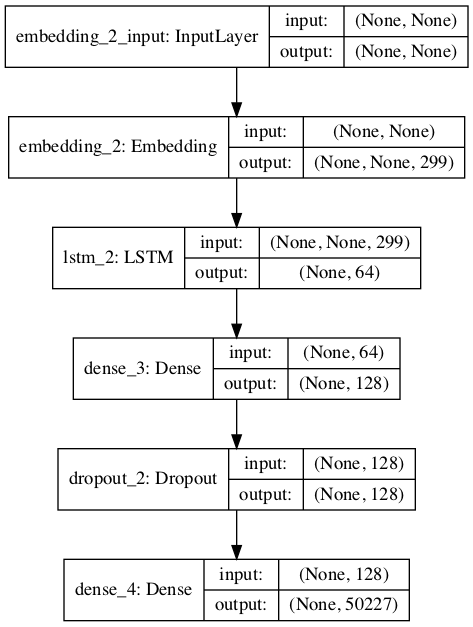

In [50]:
import keras
import pydot
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
from IPython.display import Image
model_name = 'poetry-rnn'
model_dir = './models/'

plot_model(model, to_file=f'{model_dir}{model_name}.png', show_shapes=True)

Image(f'{model_dir}{model_name}.png')

In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

BATCH_SIZE = 2048


def make_callbacks(model_name, save=SAVE_MODEL):
    """Make list of callbacks for training"""
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

    if save:
        callbacks.append(
            ModelCheckpoint(
                f'{model_dir}{model_name}.h5',
                save_best_only=True,
                save_weights_only=False))
    return callbacks


callbacks = make_callbacks(model_name)

In [275]:
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    callbacks=callbacks,
    validation_data=(X_valid, y_valid))

In [52]:
def load_and_evaluate(model_name, return_model=False):
    """Load in a trained model and evaluate with log loss and accuracy"""

    model = load_model(f'{model_dir}{model_name}.h5')
    r = model.evaluate(X_valid, y_valid, batch_size=2048, verbose=1)

    valid_crossentropy = r[0]
    valid_accuracy = r[1]

    print(f'Cross Entropy: {round(valid_crossentropy, 4)}')
    print(f'Accuracy: {round(100 * valid_accuracy, 2)}%')

    if return_model:
        return model

In [254]:
model = load_and_evaluate(model_name, return_model=True)

33338/33338 [==============================] - 18s 536us/step
Cross Entropy: 7.9032
Accuracy: 9.19%


In [276]:
np.random.seed(40)

# Number of all words
total_words = sum(word_counts.values())

# Compute frequency of each word in vocab
frequencies = [word_counts[word] / total_words for word in word_idx.keys()]
frequencies.insert(0, 0)

In [277]:
frequencies[1:10], list(word_idx.keys())[0:9]

([0.08244879152180287,
  0.08134712855527164,
  0.00343903154190927,
  0.0030704142755414066,
  0.0028651614794956647,
  0.0027143635068906297,
  0.0025719431994303188,
  0.0025593767017132326,
  0.002421145226825284],
 ['，', '。', '一', '有', '不', '无', '来', '人', '为'])

In [278]:
print(
    f'The accuracy is {round(100 * np.mean(np.argmax(y_valid, axis = 1) == 1), 4)}%.'
)

The accuracy is 7.8409%.


In [279]:
random_guesses = []

# Make a prediction based on frequencies for each example in validation data
for i in range(len(y_valid)):
    random_guesses.append(
        np.argmax(np.random.multinomial(1, frequencies, size=1)[0]))

In [280]:
from collections import Counter

# Create a counter from the guesses
c = Counter(random_guesses)

# Iterate through the 10 most common guesses
for i in c.most_common(10):
    word = idx_word[i[0]]
    word_count = word_counts[word]
    print(
        f'Word: {word} \tCount: {word_count} \tPercentage: {round(100 * word_count / total_words, 2)}% \tPredicted: {i[1]}'
    )

Word: 。 	Count: 19420 	Percentage: 8.13% 	Predicted: 2791
Word: ， 	Count: 19683 	Percentage: 8.24% 	Predicted: 2778
Word: 一 	Count: 821 	Percentage: 0.34% 	Predicted: 121
Word: 云 	Count: 572 	Percentage: 0.24% 	Predicted: 104
Word: 有 	Count: 733 	Percentage: 0.31% 	Predicted: 103
Word: 为 	Count: 578 	Percentage: 0.24% 	Predicted: 92
Word: 无 	Count: 648 	Percentage: 0.27% 	Predicted: 87
Word: 风 	Count: 546 	Percentage: 0.23% 	Predicted: 85
Word: 人 	Count: 611 	Percentage: 0.26% 	Predicted: 83
Word: 不 	Count: 684 	Percentage: 0.29% 	Predicted: 78


In [281]:
accuracy = np.mean(random_guesses == np.argmax(y_valid, axis=1))
print(f'Random guessing accuracy: {100 * round(accuracy, 4)}%')

Random guessing accuracy: 1.55%


In [63]:
from IPython.display import HTML


def header(text, color='black'):
    raw_html = f'<h1 style="color: {color};"><center>' + \
        str(text) + '</center></h1>'
    return raw_html


def box(text):
    raw_html = '<div style="border:1px inset black;padding:1em;font-size: 20px;">' + \
        str(text)+'</div>'
    return raw_html


def addContent(old_html, raw_html):
    old_html += raw_html
    return old_html

In [333]:
import random


def generate_output(model,
                    sequences,
                    training_length=25,
                    new_words=50,
                    diversity=1,
                    return_output=False,
                    n_gen=1):
    """Generate `new_words` words of output from a trained model and format into HTML."""

    # Choose a random sequence
    seq = random.choice(sequences)

    # Choose a random starting point
    seed_idx = random.randint(0, len(seq) - training_length - 10)
    # Ending index for seed
    end_idx = seed_idx + training_length

    gen_list = []

    for n in range(n_gen):
        # Extract the seed sequence
        seed = seq[seed_idx:end_idx]
        original_sequence = [idx_word[i] for i in seed]
        generated = seed[:] + ['#']

        # Find the actual entire sequence
        actual = generated[:] + seq[end_idx:end_idx + new_words]

        # Keep adding new words
        for i in range(new_words):

            # Make a prediction from the seed
            preds = model.predict(np.array(seed).reshape(1, -1))[0].astype(
                np.float64)

            # Diversify
            preds = np.log(preds) / diversity
            exp_preds = np.exp(preds)

            # Softmax
            preds = exp_preds / sum(exp_preds)

            # Choose the next word
            probas = np.random.multinomial(1, preds, 1)[0]

            next_idx = np.argmax(probas)

            # New seed adds on old word
            seed = seed[1:] + [next_idx]
            generated.append(next_idx)

        # Showing generated and actual abstract
        n = []

        for i in generated:
            n.append(idx_word.get(i, '< --- >'))

        gen_list.append(n)

    a = []

    for i in actual:
        a.append(idx_word.get(i, '< --- >'))

    a = a[training_length:]

    gen_list = [
        gen[training_length:training_length + len(a)] for gen in gen_list
    ]

    if return_output:
        return original_sequence, gen_list, a

    # HTML formatting
    seed_html = ''
    seed_html = addContent(seed_html, header(
        'Seed Sequence', color='darkblue'))
    seed_html = addContent(seed_html,
                           box(remove_spaces(' '.join(original_sequence))))

    gen_html = ''
    gen_html = addContent(gen_html, header('RNN Generated', color='darkred'))
    gen_html = addContent(gen_html, box(remove_spaces(' '.join(gen_list[0]))))

    a_html = ''
    a_html = addContent(a_html, header('Actual', color='darkgreen'))
    a_html = addContent(a_html, box(remove_spaces(' '.join(a))))

    return seed_html, gen_html, a_html

In [284]:
seed_html, gen_html, a_html = generate_output(model, sequences,
                                              TRAINING_LENGTH)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

In [285]:
seed_html, gen_html, a_html = generate_output(
    model, sequences, TRAINING_LENGTH, diversity=1)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

In [340]:
seed_html, gen_html, a_html = generate_output(
    model, sequences, training_length=8, new_words=64, diversity=0.8)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

In [347]:
seed_html, gen_html, a_html = generate_output(
    model, sequences, training_length=8, new_words=64, diversity=0.9)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

In [53]:
def clear_memory():
    import gc
    gc.enable()
    for i in [
            'model', 'X', 'y', 'word_idx', 'idx_word', 'X_train', 'X_valid,'
            'y_train', 'y_valid', 'embedding_matrix', 'words', 'vectors',
            'labels', 'random_guesses', 'training_seq', 'word_counts', 'data',
            'frequencies'
    ]:
        if i in dir():
            del globals()[i]
    gc.collect()


clear_memory()

In [54]:
TRAINING_LENGTH = 25

filters = '!"%;[\\]^_`{|}~\t\n'
word_idx, idx_word, num_words, word_counts, abstracts, sequences, features, labels = make_sequences(
    formatted, TRAINING_LENGTH, lower=False, filters=filters)

There are 50227 unique words.
There are 1301889 training sequences.


In [55]:
embedding_matrix = np.zeros((num_words, len(word_lookup['the'])))

not_found = 0

for i, word in enumerate(word_idx.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector
    else:
        not_found += 1

print(f'There were {not_found} words without pre-trained embeddings.')
embedding_matrix.shape

There were 46406 words without pre-trained embeddings.


(50227, 299)

In [56]:
# Split into training and validation
X_train, X_valid, y_train, y_valid = create_train_valid(
    features, labels, num_words)
X_train.shape, y_train.shape

((911322, 25), (911322, 50227))

In [57]:
check_sizes(gb_min=1)

Object: y_train   	Size: 45.772970206 GB.
Object: y_valid   	Size: 19.617008821 GB.


In [58]:
model = make_word_level_model(
    num_words,
    embedding_matrix,
    lstm_cells=LSTM_CELLS,
    trainable=True,
    lstm_layers=1)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 299)         15017873  
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                93184     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50227)             6479283   
Total params: 21,598,660
Trainable params: 21,598,660
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_name = 'train-embeddings-rnn_qts'

callbacks = make_callbacks(model_name)

In [ ]:
model.compile(
    optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=(X_valid, y_valid))

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [60]:
model = load_and_evaluate(model_name, return_model=True)

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


390567/390567 [==============================] - 379s 971us/step
Cross Entropy: 6.7363
Accuracy: 18.97%


In [357]:
seed_html, gen_html, a_html = generate_output(
    model, sequences, training_length=8, new_words=64, diversity=0.9)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

In [376]:
seed_html, gen_html, a_html = generate_output(
    model, sequences, training_length=5, new_words=25, diversity=1.25)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

In [385]:
seed_html, gen_html, a_html = generate_output(
    model, sequences, training_length=5, new_words=100, diversity=1)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

In [409]:
training_length = 5
new_texts = formatted
new_texts.append(format_poem(original_poems[100]))

# Create the tokenizer object and train on texts
filters = '!"%;[\\]^_`{|}~\t\n'
tokenizer = Tokenizer(lower=False, filters=filters)
tokenizer.fit_on_texts(new_texts)

# Create look-up dictionaries and reverse look-ups
#word_idx = tokenizer.word_index
#idx_word = tokenizer.index_word
#num_words = len(word_idx) + 1
#word_counts = tokenizer.word_counts
#print(f'There are {num_words} unique words.')

# Convert text to sequences of integers
new_sequences = tokenizer.texts_to_sequences(new_texts)

# Choose a random sequence
seq = sequences[-1]

# Choose a random starting point
seed_idx = 0

# Ending index for seed
if len(seq) > training_length:
    end_idx = training_length
else:
    end_idx = -1

In [411]:
seq

[2031,
 13109,
 235,
 57,
 995,
 1,
 12846,
 41,
 293,
 1222,
 9424,
 2,
 461,
 4985,
 1288,
 664,
 11873,
 1,
 2770,
 425,
 1437,
 9473,
 2,
 2386,
 877,
 85,
 620,
 79,
 6154,
 1,
 2421,
 9461,
 7069,
 5,
 772,
 284,
 2,
 25,
 24,
 1120,
 803,
 3300,
 206,
 1,
 13,
 669,
 1144,
 478,
 305,
 2681,
 2]

In [64]:
import random


def generate_output(model,
                    sequences,
                    prompt,
                    texts=formatted,
                    flag=1,
                    training_length=5,
                    new_words=50,
                    diversity=1,
                    return_output=False,
                    n_gen=1):
    """Generate `new_words` words of output from a trained model and format into HTML."""
    
    if flag:
        new_texts = formatted
        new_texts.append(format_poem(prompt))
        
        # Create the tokenizer object and train on texts
        filters = '!"%;[\\]^_`{|}~\t\n'
        tokenizer = Tokenizer(lower=False, filters=filters)
        tokenizer.fit_on_texts(new_texts)
        
        # Convert text to sequences of integers
        new_sequences = tokenizer.texts_to_sequences(new_texts)
        
        # Create look-up dictionaries and reverse look-ups
        word_idx = tokenizer.word_index
        idx_word = tokenizer.index_word
        num_words = len(word_idx) + 1
        word_counts = tokenizer.word_counts
        print(f'There are {num_words} unique words.')

        # Choose a random sequence
        seq = new_sequences[-1]
        print(len(new_texts))
        print(new_texts[-1])
        print(len(new_sequences))
        print(new_sequences[-1])
        
        # Choose a random starting point
        seed_idx = 0
        
        # Ending index for seed
        if len(seq) > training_length:
            end_idx = training_length
        else:
            end_idx = -1
    else:
        # Choose a random sequence
        seq = random.choice(sequences)

        # Choose a random starting point
        seed_idx = random.randint(0, len(seq) - training_length - 10)
        # Ending index for seed
        end_idx = seed_idx + training_length

    gen_list = []

    for n in range(n_gen):
        # Extract the seed sequence
        seed = seq[seed_idx:end_idx]
        original_sequence = [idx_word[i] for i in seed]
        generated = seed[:] + ['#']

        # Find the actual entire sequence
        actual = generated[:] + seq[end_idx:end_idx + new_words]

        # Keep adding new words
        for i in range(new_words):

            # Make a prediction from the seed
            preds = model.predict(np.array(seed).reshape(1, -1))[0].astype(
                np.float64)

            # Diversify
            preds = np.log(preds) / diversity
            exp_preds = np.exp(preds)

            # Softmax
            preds = exp_preds / sum(exp_preds)

            # Choose the next word
            probas = np.random.multinomial(1, preds, 1)[0]

            next_idx = np.argmax(probas)

            # New seed adds on old word
            seed = seed[1:] + [next_idx]
            generated.append(next_idx)

        # Showing generated and actual abstract
        n = []

        for i in generated:
            n.append(idx_word.get(i, '< --- >'))

        gen_list.append(n)

    a = []

    for i in actual:
        a.append(idx_word.get(i, '< --- >'))

    a = a[training_length:]

    gen_list = [
        gen[training_length:len(gen)] for gen in gen_list
    ]
    #gen[training_length:training_length + len(a)] for gen in gen_list
    
    if return_output:
        return original_sequence, gen_list, a

    # HTML formatting
    seed_html = ''
    seed_html = addContent(seed_html, header(
        'Seed Sequence', color='darkblue'))
    seed_html = addContent(seed_html,
                           box(remove_spaces(' '.join(original_sequence))))

    gen_html = ''
    gen_html = addContent(gen_html, header('RNN Generated', color='darkred'))
    gen_html = addContent(gen_html, box(remove_spaces(' '.join(gen_list[0]))))

    a_html = ''
    a_html = addContent(a_html, header('Actual', color='darkgreen'))
    a_html = addContent(a_html, box(remove_spaces(' '.join(a))))

    return seed_html, gen_html, a_html

In [67]:
prompt = '大漠沙如雪，燕山月似钩。何当金络脑，快走踏清秋。'
seed_html, gen_html, a_html = generate_output(
    model, sequences, prompt=prompt, texts=formatted, flag=1, training_length=4, new_words=25, diversity=1.25)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

There are 50227 unique words.
42977
大漠 沙 如 雪 ， 燕山 月 似 钩 。 何当 金 络 脑 ， 快 走 踏 清秋 。
42977
[5791, 361, 28, 89, 1, 5155, 16, 74, 1095, 2, 1800, 77, 2803, 5197, 1, 4283, 857, 1326, 2254, 2]


In [74]:
prompt = example0
seed_html, gen_html, a_html = generate_output(
    model, sequences, prompt=prompt, texts=formatted, flag=1, training_length=10, new_words=35, diversity=.75)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

There are 50227 unique words.
42983
润色 鸿业 寄 贤才 ， 叨 居 右 弼 愧 盐 梅 。 运筹 运筹帷幄 帷幄 荷 时 来 ， 职掌 图籍 滥 蓬莱 。 两 司 谬 忝 谢 钟 裴 ， 礼乐 铨 管 效 涓埃 。 陈 师 振 旅 清 九 垓 ， 欣 承 顾问 侍 天 杯 。 衔 恩 献 寿 柏梁台 ， 黄 缣 青 简 奉 康 哉 。 鲰 生 侍从 忝 王 枚 ， 右 掖 司 言实 不 才 。 宗 伯 秩 礼 天地 开 ， 帝 歌 难 续 仰 昭 回 。 微臣 捧 日 变 寒 灰 ， 远 惭 班 左 愧 游 陪 。
42983
[13300, 12152, 232, 9710, 1, 2795, 324, 1965, 12153, 830, 2805, 619, 2, 11648, 21772, 10022, 681, 15, 9, 1, 21773, 13301, 3956, 1532, 2, 320, 1520, 2252, 1502, 314, 437, 938, 1, 3049, 11649, 743, 2502, 18130, 2, 556, 480, 1043, 904, 43, 447, 6206, 1, 1983, 529, 12154, 1046, 60, 577, 2, 685, 243, 684, 978, 16835, 1, 296, 4889, 121, 1368, 746, 1811, 864, 2, 21774, 44, 4702, 1502, 222, 4647, 1, 1965, 1907, 1520, 19724, 3, 206, 2, 1166, 1254, 2315, 570, 689, 73, 1, 333, 134, 92, 2443, 995, 1383, 90, 2, 4830, 1304, 18, 574, 38, 1247, 1, 45, 541, 1461, 1826, 830, 126, 895, 2]


In [75]:
prompt = original_poems[1002]
seed_html, gen_html, a_html = generate_output(
    model, sequences, prompt=prompt, texts=formatted, flag=1, training_length=10, new_words=100, diversity=.75)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

There are 50227 unique words.
42984
日暮 铜 雀 迥 ， 幽 声 玉 座 清 。 萧森 松柏 望 ， 委 郁 绮罗 情 。 君 恩 不再 重 ， 妾 舞 为 谁 轻 。
42984
[807, 1493, 1478, 765, 1, 176, 95, 50, 1319, 43, 2, 10845, 1985, 93, 1, 971, 1368, 2352, 169, 2, 8, 243, 5306, 109, 1, 617, 299, 10, 41, 144, 2]


In [76]:
prompt = original_poems[1002]
seed_html, gen_html, a_html = generate_output(
    model, sequences, prompt=prompt, texts=formatted, flag=1, training_length=10, new_words=100, diversity=.5)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

There are 50227 unique words.
42985
日暮 铜 雀 迥 ， 幽 声 玉 座 清 。 萧森 松柏 望 ， 委 郁 绮罗 情 。 君 恩 不再 重 ， 妾 舞 为 谁 轻 。
42985
[805, 1487, 1473, 764, 1, 176, 95, 50, 1317, 43, 2, 10466, 1980, 93, 1, 969, 1367, 2335, 168, 2, 8, 243, 5217, 109, 1, 616, 298, 10, 41, 144, 2]


In [81]:
prompt = original_poems[1002]
seed_html, gen_html, a_html = generate_output(
    model, sequences, prompt=prompt, texts=formatted, flag=1, training_length=10, new_words=100, diversity=.4)
HTML(seed_html)
HTML(gen_html)
HTML(a_html)

There are 50227 unique words.
42990
日暮 铜 雀 迥 ， 幽 声 玉 座 清 。 萧森 松柏 望 ， 委 郁 绮罗 情 。 君 恩 不再 重 ， 妾 舞 为 谁 轻 。
42990
[798, 1466, 1453, 757, 1, 176, 94, 47, 1299, 43, 2, 8904, 1940, 92, 1, 956, 1341, 2259, 168, 2, 8, 241, 4844, 109, 1, 612, 295, 10, 41, 144, 2]
